In [ ]:
# 나만의 git 저장소를 가져보도록 하자!
# 1. Github에 접속한다.
# 2. 로그인하고 접속하면 Repositories에 New가 있고 이것을 누른다.
# 3. 맨 위쪽에 Repository Name과 Description을 작성한다.
# 4. 아래쪽의 .gitignore를 설정해주고 라이센스를 선택한다.
#    회사에서 라이센스 선택시 회의가 필요하므로 이런 작업을 할 일이 있다면
#    반드시 먼저 상사에게 보고를 하고 진행하도록 한다.
# 5. Create Repository를 눌러서 저장소를 생성한다.
# 6. 초록색 버튼 Code에 보면 Clone이 있다.
#    해당 URL을 전부 복사한다.
# 7. 먼저 저장소의 기본 위치를 선택한다.
#    cd ~
#    cd proj
#    홈 디렉토리 밑에 proj에 진입하게 된다.
# 8. git clone '가져오고 싶은 저장소 이름'
#    (홑 따옴표 필요 없음)
# 9. 작업할 저장소로 위치를 이동한다.
# 10. 해당 위치에서 jupyter notebook을 입력한다.
# 11. 그러면 웹 브라우저에 쥬피터가 실행될 것이고
#     여기서 기존에 파이썬 작업을 하듯이 파일을 작성하면 된다.
# 12. git status - 현재 추적되지 않고 있는 파일을 볼 수 있다.
# 13. 추적이 되지 않으므로 해당 파일을 추적하고 싶다면
#     git add를 통해 파일을 추적할 수 있게 만들어준다.
#     정말 잘 추적이 되는지 확인하기 위해
#     github에 있는 저장소 원본으로 이동해서 추적되지 않음을 확인한다.
#     git add '추적할 파일명 혹은 디렉토리 전체도 가능'
# 14. git status를 입력하면 추적이 됨을 알리는 초록색 파일로 나타난다.
#     그리고 commit 하라는 메시지가 같이 올라온다.
# 15. git push origin master
#     커밋된 내용을 모두 master(원격 저장소:원본)에 갱신한다.
# *** 만약 위의 명령을 쳤는데 config --global 나오면
#     해당 명령으로 email 주소와 name을 등록하면 된다.
#     git config --global user.name "git 이름 및 별명"
#     git config --global user.email "깃 가입시 사용한 이메일 주소"

In [1]:
print("seventh")

seventh


In [6]:
import time
import multiprocessing

# multiprocessing.Process는 프로세스를 만드는데 활용
class countDown(multiprocessing.Process):
    
    # 생성자쪽에서 multiprocessing.Process의 생성자를 호출해서 실제 가능한 프로세스 생서
    # 해당 프로세스에는 x값을 입력으로 들어온 값을 설정
    def __init__(self, x):
        multiprocessing.Process.__init__(self)
        self.x = x
        
    # 실제 프로세스가 run()을 사용하면 구동하는 함수
    def run(self):
        while True:
            if self.x == 0:
                break
                
            print("Count Down ... %d" % self.x)
            self.x -= 1
            # sleep(초단위 시간)을 통해서 대기할 수 있음
            time.sleep(1)
            
# 5초간 5 4 3 2 1을 카운트하는 프로세스를 생성한다
p = countDown(5)

# 실제 p에 해당하는 클래스의 run()을 구동
p.start()

Count Down ... 5
Count Down ... 4
Count Down ... 3
Count Down ... 2
Count Down ... 1


In [ ]:
# 프로그램이 구동되는 도중에는 <defunct> 표시가 없었는데
# 프로그램이 구동 완료된 이후에는 <defunct> 표시가 나타났다.
# 리눅스에서는 프로세스를 관리할 때
# 자식 프로세스가 죽으면 부모 프로세스 자식 프로세스의 시신을 회수해 가야 한다.
# 그러나 부모 프로세스도 죽었다면 좀비 프로세스가 되서
# init 프로세스가 정화를 해줄때까지 defunct 상태에 놓이게 된다.
# 7627  5112  0 10:58 ?        00:00:00 [ZMQbg/83] <defunct>
# 적당한 시간이 지나면 init(최상위 조상) 프로세스가 죽은 프로세스를 정리한다.
# 정리하고 난 이후에 다시 ps -ef 명령을 보면
# 기존에 있던 프로세스 아이디(PID)가 사라진 것을 확인할 수 있다.

In [7]:
# 멀티프로세스란? 여러 개의 프로세스가 동시다발적으로 작업을 하는 과정 

import time
import multiprocessing

# process함수는 메시지를 출력하고 일정 간격으로 동작을 하도록 support !
def process(message, interval):
    while True:
        print("I'm workging ....: %s" %message)
        time.sleep(interval)
        
# 람다 >> 메서드를 객체화
# p1이라는 프로세스를 만드는데 이 녀석에게 def process()의 일으 시킬 것이다.
# 그리고 파라미터(입력)로는 args=("p1", 1)을 전달할 것이다.
p1 = multiprocessing.Process(target = process, args = ("p1", 1, ))
p2 = multiprocessing.Process(target = process, args = ("p2", 2, ))
p3 = multiprocessing.Process(target = process, args = ("p3", 3, ))
p4 = multiprocessing.Process(target = process, args = ("p4", 4, ))

p1.start()
p2.start()
p3.start()
p4.start()

cnt = 0
while cnt < 100:
    cnt += 1
    
    # 메인 스레드 == 부모 프로세스
    # 프로세스를 생성할 때는 부모 프로세스가 자식 프로세스를 관리하게 된다
    # ps -ef 명령으로 볼 때 >> 자식 프로세스들은 모두 공통된 부모 프로세스를 갖는다.
    # 자식의 프로세스 ID는 PID, 부모 프로세스의 ID는 PPID
    print("Main Thread....")
    time.sleep(1)
    
# ps -ef로 프로세스 리스트를 확인할 수 있고, 확인된 프로세스들 중 강제종료를 하고 싶다면 >> kill -9 PID 숫자를 통해서 제거 가능


I'm workging ....: p1
I'm workging ....: p2
I'm workging ....: p3
I'm workging ....: p4
Main Thread....
I'm workging ....: p1
Main Thread....
I'm workging ....: p2
I'm workging ....: p1
Main Thread....
I'm workging ....: p3
I'm workging ....: p1
Main Thread....
I'm workging ....: p2
I'm workging ....: p1
I'm workging ....: p4
Main Thread....
I'm workging ....: p1
Main Thread....
I'm workging ....: p2
I'm workging ....: p3
I'm workging ....: p1
Main Thread....
I'm workging ....: p1
Main Thread....
I'm workging ....: p2
I'm workging ....: p4
I'm workging ....: p1
Main Thread....
I'm workging ....: p3
I'm workging ....: p1
Main Thread....
I'm workging ....: p2
I'm workging ....: p1
Main Thread....
I'm workging ....: p1
Main Thread....
I'm workging ....: p3
I'm workging ....: p4
I'm workging ....: p2
I'm workging ....: p1
Main Thread....
I'm workging ....: p1
Main Thread....
I'm workging ....: p2
I'm workging ....: p1
Main Thread....
I'm workging ....: p3
I'm workging ....: p1
Main Thread.

Process Process-3:
Process Process-6:
Process Process-4:
Process Process-5:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/proces

KeyboardInterrupt: 

In [15]:
import time
from multiprocessing import Pool

def f(x):
    return x * x

# 프로세스들의 집합 장소를 만들어서 4개를 수용할 수 있도록 하였다.
pool = Pool(processes = 4)

# 이때 작업 전체는 비동기 처리가 이루어진다.
# pool.apply_async()가 비동기 처리 작업을 지원한다.
# 숫자 10을 제곱하는 용도
# 프로세스에 작업 처리를 전달할 경우에는 데이터 2개를 넣을 때
# 2개를 표시해주고 , 표시하고 괄호를 닫아야 한다.
# ex) pool.abcd(f, (10, 20, ))
res = pool.apply_async(f, (10, ))

# 1초안에 처리하지 못하면 에러!
# 처리를 한다면 결과를 출력한다.
print(res.get(timeout = 1))

# 위의 def f라는 기능을 10번 작업하도록 한다.
# range(10)은 데이터 개수가 10개 이므로 비동기 처리의 의미가 있다.
print(pool.map(f, range(10)))

# pool.imap의 경우에는 출력하지 않고 iteration(반복) 가능한 객체를 만든다.
it = pool.imap(f, range(10))

# it.next()를 통해서 첫 번째 결과
print(it.next()) # >> 0

# 두 번째 결과
print(it.next()) # >> 1

# 세 번째 결과를 출력한다.
print(it.next(timeout = 2)) # >> 4

# 10초간 슬립하고 하는 일이 없으므로 None이 나온다.
res = pool.apply_async(time.sleep, (10, ))
print(res.get(timeout = 60))
print("pass")

# 10초간 슬립을 하는데 대기 시간은 3초이므로 에러가 발생!
res = pool.apply_async(time.sleep, (10, ))
print(res.get(timeout = 3))

100
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
0
1
4
None
pass


TimeoutError: 

In [18]:
import multiprocessing as mp

def withdraw(money):
    for _ in range(20000):
        money.value -= 1
    
def deposit(money):
    for _ in range(20000):
        money.value += 1
        
def perform_process():
    
    # money는 크리티컬 섹션이 되었다.
    # 공유자원 생성
    money = mp.Value('i', 20000)
    
    p1 = mp.Process(target = withdraw, args = (money, ))
    p2 = mp.Process(target = deposit, args = (money, ))
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()
    
    print("Final Money = {}".format(money.value))
    
for _ in range(10):
    perform_process()

Final Money = 19562
Final Money = 16022
Final Money = 20360
Final Money = 22394
Final Money = 19751
Final Money = 19112
Final Money = 18472
Final Money = 20716
Final Money = 18139
Final Money = 20318


In [19]:
import multiprocessing as mp

# p1 프로세스의 작업 - 0.000000001
def withdraw(money, lock):
    for _ in range(20000):
        
        # 자물쇠를 채운다(lock.acquire()).
        # 자물쇠를 채웠으므로 아무도 여기에는 이제 들어오지 못한다.
        # 들어오지 못하는 영역이 결국 크리티컬 섹션이다.
        # 만약 자물쇠(락)가 채워진 상태에서 다른 녀석이
        # 자물쇠(락)을 얻으려고 하면 접근하지 못하게 된다.
        # (락이 풀릴때 까지 - lock.release())
        lock.acquire()
        money.value -= 1
        lock.release()
    
# p2 프로세스의 작업 - 0.000000007
def deposit(money, lock):
    for _ in range(20000):
        lock.acquire()
        money.value += 1
        lock.release()
        
def perform_process():
    
    # money는 크리티컬 섹션이 되었다.
    # 프로세스 간에는 데이터를 공유할 수 있음 >> IPC라는 것을 사용하여 공유할 수 있게 도와줌
    # i: 내부적으로 변수를 어떻게 설정해줄지 결정
    money = mp.Value('i', 20000)
    
    # 크리티컬 섹션을 보호해주기 위한 락을 추가했다.
    # 락을 남발하면 오히려 성능을 저하시킬 수 있다.
    # 그러나 크리티컬 섹션에 대한 보호를 수행하는데 락을 반드시 사용해야 한다.
    lock = mp.Lock()
    
    p1 = mp.Process(target = withdraw, args = (money, lock, ))
    p2 = mp.Process(target = deposit, args = (money, lock, ))
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()
    
    print("Final Money = {}".format(money.value))
    
for _ in range(10):
    perform_process()

Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000


In [20]:
# 세마포 >> 락에 들어갈 수 있는 스레드나 프로세스가 정해져있음, 비동기처리, Context Switching, 복잡한 작업
### Context SWitching >> 프로세스가 전환될 때, 이전 레지스터 정보를 스택에 저장 후 전환
#
# Spinlock >> while Loop, 폴링(polling), 단순 작업

In [26]:
import time
import threading

# threading.Thread를 상속받아 DummyThread를 기본적인 Thread 구조로 만들었다
# 여기서는 run만 구현하면 바로 스레드를 활용할 수 있게 된다.
# run에는 스레드가 작업할 내용을 작성해주면 된다.
class DummmyThread(threading.Thread):
    def run(self):
        
        # time.ctime()은 생성 시간
        now = time.ctime()
        
        # self.ident는 Thread 자체의 ID값을 나타낸다.
        print(
            "[time:%s][tid:%d] Thread! \n" % (now, self.ident)
        )
        time.sleep(30)

# 스레드 전체 총괄하는 Main Thread(Process)가 있고 Main Thread의 통제를 받는 12개의 별도 Thread가 존재
# ps -eLF로 확인할 수 있음
for _ in range(12):
    t = DummmyThread()
    t.start()

[time:Thu Jul  2 15:05:21 2020][tid:139714766018304] Thread! 

[time:Thu Jul  2 15:05:21 2020][tid:139714791196416] Thread! 

[time:Thu Jul  2 15:05:21 2020][tid:139714279503616] Thread! 

[time:Thu Jul  2 15:05:21 2020][tid:139714774411008] Thread! 

[time:Thu Jul  2 15:05:21 2020][tid:139716318181120] Thread! 
[time:Thu Jul  2 15:05:21 2020][tid:139716309788416] Thread! 


[time:Thu Jul  2 15:05:21 2020][tid:139715957225216] Thread! 

[time:Thu Jul  2 15:05:21 2020][tid:139715948832512] Thread! 

[time:Thu Jul  2 15:05:21 2020][tid:139715940439808] Thread! 

[time:Thu Jul  2 15:05:21 2020][tid:139715932047104] Thread! 

[time:Thu Jul  2 15:05:21 2020][tid:139715923654400] Thread! 

[time:Thu Jul  2 15:05:21 2020][tid:139715915261696] Thread! 



In [27]:
# Thread 와 Process의 차이점이 하나 있다.
# Thread는 기본적으로 Data 영역을 공유
# Process는 기본적으로 Data 영역이 구분

In [36]:
import threading

# 전역 변수는 Data 영역에 배치
x = 0

def increment_global():
    global x
    x += 1
    
def taskOfThread():
    for _ in range(100000):
        increment_global()

def thread_main():
    global x
    x = 0
    
    # 2개의 Thread 생성
    t1 = threading.Thread(target=taskOfThread)
    t2 = threading.Thread(target=taskOfThread)
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()
    
# 이번 예재를 통해서 쓰레드가 전역변수의 내용을 별도의 작업 없이도 공유할 수 있음을 확인할 수 있음
for i in range(10):
    thread_main()
    print("x = {1} after Iteration {0}".format(i, x))

x = 200000 after Iteration 0
x = 200000 after Iteration 1
x = 200000 after Iteration 2
x = 200000 after Iteration 3
x = 200000 after Iteration 4
x = 200000 after Iteration 5
x = 200000 after Iteration 6
x = 138799 after Iteration 7
x = 200000 after Iteration 8
x = 200000 after Iteration 9


In [2]:
import threading

# Threading 라이브러리의 Lock을 사용하는 것이 좋다
lock = threading.Lock()
# 전역 변수는 Data 영역에 배치
x = 0


def increment_global():
    global x
    x += 1
    
def taskOfThread():
    for _ in range(100000):
        lock.acquire()
        increment_global()
        lock.release()
        
def thread_main():
    global x
    x = 0
    
    # 2개의 Thread 생성
    t1 = threading.Thread(target=taskOfThread)
    t2 = threading.Thread(target=taskOfThread)
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()
    
# 이번 예재를 통해서 쓰레드가 전역변수의 내용을 별도의 작업 없이도 공유할 수 있음을 확인할 수 있음
for i in range(10):
    thread_main()
    print("x = {1} after Iteration {0}".format(i, x))

x = 200000 after Iteration 0
x = 200000 after Iteration 1
x = 200000 after Iteration 2
x = 200000 after Iteration 3
x = 200000 after Iteration 4
x = 200000 after Iteration 5
x = 200000 after Iteration 6
x = 200000 after Iteration 7
x = 200000 after Iteration 8
x = 200000 after Iteration 9


In [7]:
def square2(x):
    return x*x
    
myList = [1, 2, 3, 4, 5]
res = []

for num in myList:
    res.append(square2(num))


In [10]:
import os
import multiprocessing

def square(n):
    print("Worker Process is for {0}: {1}".format(n, os.getpid()))
    return n*n

p = multiprocessing.Pool()
res = p.map(square, myList)

print(res)

Worker Process is for 2: 14000
Worker Process is for 1: 13999
Worker Process is for 4: 14002
Worker Process is for 5: 14003
Worker Process is for 3: 14001
[1, 4, 9, 16, 25]


In [4]:
import threading
import time
import logging

logging.basicConfig(level = logging.DEBUG, format='(%(threadName)-9s)%(message)s', )

class ThreadPool(object):
    def __init__(self):
        super(ThreadPool, self).__init__()
        self.active = []
        self.lock = threading.Lock()
        
    def makeActive(self, name):
        print('make active')
        
        # with가 걸려있으면 해당 스코프가 끝나기 전에 lock이 release되지 않는다.
        with self.lock:
            print('make active append')
            
            # 실제 연산할 내용은 여기에 작성한다.
            self.active.append(name)
            time.sleep(5)
            logging.debug('Running: %s', self.active)
            
    def makeInactive(self, name):
        print('make inactive')
        with self.lock:
            print('make inactive remove')
            self.active.remove(name)
            logging.debug('Runnig: %s', self.active)
            
def f(s, pool):
    logging.debug('Waiting to join the pool')
    
    # 세마포 베이스의 작업을 하겠다는 의미
    with s:
        name = threading.currentThread().getName()
        pool.makeActive(name)
        time.sleep(1)
        pool.makeInactive(name)
           
# 여러 개의 스레드를 수용할 수 있는 Pool을 만든다.
pool = ThreadPool()

# 최대 3개까지 사용할 수 있는 세마포를 만든다.
s = threading.Semaphore(3)            

# 총 10개의 스레드를 만들어서 구동시킨다.
for i in range(10):
    t = threading.Thread(target = f, name = 'thread_'+ str(i), args = (s, pool))
    t.start()

(thread_0 )Waiting to join the pool
(thread_1 )Waiting to join the pool
(thread_2 )Waiting to join the pool
(thread_3 )Waiting to join the pool
(thread_4 )Waiting to join the pool
(thread_5 )Waiting to join the pool
(thread_6 )Waiting to join the pool
(thread_7 )Waiting to join the pool
(thread_8 )Waiting to join the pool


make active
make active append
make active
make active


(thread_9 )Waiting to join the pool
(thread_0 )Running: ['thread_0']


make active append
make inactive


(thread_1 )Running: ['thread_0', 'thread_1']


make active append
make inactive


(thread_2 )Running: ['thread_0', 'thread_1', 'thread_2']
(thread_0 )Runnig: ['thread_1', 'thread_2']
(thread_1 )Runnig: ['thread_2']


make inactive remove
make activemake inactive remove

make activemake active append

make inactive


(thread_3 )Running: ['thread_2', 'thread_3']


make active append
make inactive


(thread_4 )Running: ['thread_2', 'thread_3', 'thread_4']
(thread_2 )Runnig: ['thread_3', 'thread_4']
(thread_3 )Runnig: ['thread_4']


make inactive remove
make inactive removemake active

make active
make active append
make inactive


(thread_5 )Running: ['thread_4', 'thread_5']


make active append
make inactive


(thread_6 )Running: ['thread_4', 'thread_5', 'thread_6']
(thread_4 )Runnig: ['thread_5', 'thread_6']
(thread_5 )Runnig: ['thread_6']


make inactive remove
make active
make inactive remove
make active append
make active
make inactive


(thread_7 )Running: ['thread_6', 'thread_7']


make active append
make inactive


(thread_8 )Running: ['thread_6', 'thread_7', 'thread_8']
(thread_6 )Runnig: ['thread_7', 'thread_8']
(thread_7 )Runnig: ['thread_8']


make inactive remove
make activemake inactive remove

make active append
make inactive


(thread_9 )Running: ['thread_8', 'thread_9']
(thread_8 )Runnig: ['thread_9']


make inactive remove


(thread_9 )Runnig: []


make inactive
make inactive remove


[[166.   58.7]
 [176.   75.7]
 [171.   90.1]
 [169.   60.1]
 [173.   70.4]]
(5, 2)


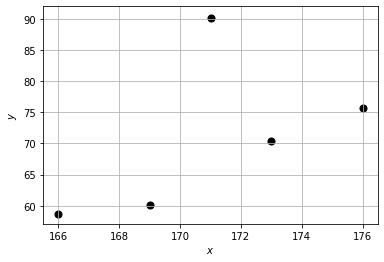

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sampleData1 = np.array([[166, 58.7], [176.0, 75.7], [171.0, 90.1], [169, 60.1], [173.0, 70.4]])\

# 위의 방식으로 행렬을 만들 수 있다.
print(sampleData1)

# 행렬 변수의 shape을 출력하면 행렬의 차원을 얻을 수 있다.
print(sampleData1.shape)

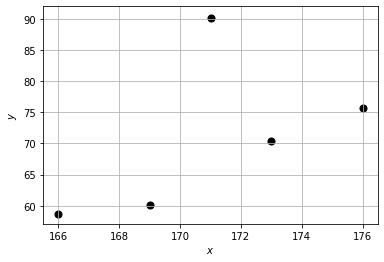

In [8]:
for p in sampleData1:
    plt.scatter(p[0], p[1], c='k', s=50)
    
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [10]:
# 0 ~ 9
value1 = np.arange(10)

# 5 ~ 14
value2 = np.arange(5, 15)

# 1 ~ 99까진데 중간의 차이가 2씩 존재
value3 = np.arange(1, 100, 2)

print(value1)
print(value2)
print(value3)

[0 1 2 3 4 5 6 7 8 9]
[ 5  6  7  8  9 10 11 12 13 14]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


In [7]:
dx = 0.0000001
start = 0.0
end = 3.0

loopLen = (end - start) / dx
print(loopLen)

x = 0
y = 0
area = 0

for i in range(int(loopLen)):
    y = x ** 2
    x += dx
    area += dx * y
    
print("0 ~ 3까지 적분 결과는 = " + str(area))

30000000.0
0 ~ 3까지 적분 결과는 = 8.999999547431766


In [42]:
import numpy as np

dx = 0.000001

# y = x^2
def integralRange(start, end):
    curX = np.arange(start, end, dx)
    Y = curX ** 2
    eachBlock = dx * Y
    area = np.sum(eachBlock)
    return area
    
print("y = x^2에 대한 0 ~ 3까지의 정적분 결과 : ",integralRange(0, 3))

y = x^2에 대한 0 ~ 3까지의 정적분 결과 :  8.999995500000502


In [2]:
import os
import numpy as np
import multiprocessing

dx = 0.001

def calc(x):
    return dx * (x ** 2)

def integralRange2(start, end):
    curX = np.arange(start, end, dx)
    
    p = multiprocessing.Pool()
    res = p.map(calc, curX)
    area = np.sum(res)
    return area

print("y = x^2에 대한 0 ~ 3까지의 정적분 결과 : ",integralRange2(0, 3))

y = x^2에 대한 0 ~ 3까지의 정적분 결과 :  8.9955005


In [9]:
import os
import time
import numpy as np
import multiprocessing

dx = 0.0000001
start = 0.0
end = 3.0

t = time.mktime(time.localtime())

loopLen = (end - start) / dx
print(loopLen)

x = 0
y = 0
area = 0

for i in range(int(loopLen)):
    y = x ** 2
    x += dx
    area += dx * y
    
print("0 ~ 3까지 적분 결과는 = " + str(area))

t1 = time.mktime(time.localtime()) - t
print("t1 =", t1)

30000000.0
0 ~ 3까지 적분 결과는 = 8.999999547431766
t1 = 5.0


In [10]:
import time
import numpy as np

t = time.mktime(time.localtime())

dx = 0.0000001

# y = x^2
def integralRange2(start, end):
    curX = np.arange(start, end, dx)
    Y = curX ** 2
    eachBlock = dx * Y
    area = np.sum(eachBlock)
    return area
    
print("y = x^2의 0 ~ 3 까지 정적분 결과 =", integralRange2(0, 3))

t1 = time.mktime(time.localtime()) - t
print("t1 =", t1)

y = x^2의 0 ~ 3 까지 정적분 결과 = 8.999999550000005
t1 = 0.0


In [11]:
import os
import time
import numpy as np
import multiprocessing

dx = 0.0000001
p = multiprocessing.Pool(processes = 12)

t = time.mktime(time.localtime())

def calc(x):
    return dx * (x ** 2)

def integralRange(start, end):
    curX = np.arange(start, end, dx)
    # apply_async의 경우에는 비동기 처리 - 0.000x 초
    res = p.apply_async(calc, curX)
    # map의 경우엔 동기 처리 - 76 초
    #res = p.map(calc, curX)
    area = np.sum(res)
    return area

print("x^2의 0 ~ 3까지의 정적분 =", integralRange(0, 3))

t1 = time.mktime(time.localtime()) - t
print("t1 =", t1)

x^2의 0 ~ 3까지의 정적분 = <multiprocessing.pool.ApplyResult object at 0x7fdb0c20ff50>
t1 = 0.0
